In [967]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import display, Markdown
import seaborn as sns
from src.make_db import create_movies_db

create_movies_db()
con = sqlite3.connect('data/movies.db')

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [737]:
df = pd.read_sql("select * from tn_movie_budgets;", con)



df['production_budget'] = df['production_budget'].str.replace(',', '', regex = True)
df['production_budget'] = df['production_budget'].str.replace('$', '', regex = True).astype(int)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '', regex = True)
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '', regex = True).astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '', regex = True)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '', regex = True).astype(int)
df.release_date = pd.to_datetime(df.release_date)
df['logged_budget'] = np.log(df['production_budget'])
df['total_gross'] = df['worldwide_gross'] + df['domestic_gross'] 
df['net_profit'] = df['total_gross'] - df['production_budget']
df['return_on_investment'] = df['total_gross'] / df['production_budget']
df = df[(df['release_date'] >= '2010-01-01') & (df['release_date'] <= '2020-01-01')]
month = df['release_date'].apply(lambda x: x.month)
year = df['release_date'].apply(lambda x: x.year)
df['date_month'] = month
df['date_year'] = year
df

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,logged_budget,total_gross,net_profit,return_on_investment,date_month,date_year
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,19.833130,1286727750,876127750,3.133774,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,19.673444,192524700,-157475300,0.550071,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,19.616420,1862019831,1531419831,5.632244,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,19.574412,1936903129,1619903129,6.110105,12,2017
5,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,19.539096,2989973445,2683973445,9.771155,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,2014-12-31,Stories of Our Lives,15000,0,0,9.615805,0,-15000,0.000000,12,2014
5771,5771,72,2015-05-19,Family Motocross,10000,0,0,9.210340,0,-10000,0.000000,5,2015
5772,5772,73,2012-01-13,Newlyweds,9000,4584,4584,9.104980,9168,168,1.018667,1,2012
5777,5777,78,2018-12-31,Red 11,7000,0,0,8.853665,0,-7000,0.000000,12,2018


In [742]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])



In [743]:
df

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,logged_budget,total_gross,net_profit,return_on_investment,date_month,date_year
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,19.833130,1286727750,876127750,3.133774,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,19.673444,192524700,-157475300,0.550071,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,19.616420,1862019831,1531419831,5.632244,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,19.574412,1936903129,1619903129,6.110105,12,2017
5,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,19.539096,2989973445,2683973445,9.771155,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,2014-12-31,Stories of Our Lives,15000,0,0,9.615805,0,-15000,0.000000,12,2014
5771,5771,72,2015-05-19,Family Motocross,10000,0,0,9.210340,0,-10000,0.000000,5,2015
5772,5772,73,2012-01-13,Newlyweds,9000,4584,4584,9.104980,9168,168,1.018667,1,2012
5777,5777,78,2018-12-31,Red 11,7000,0,0,8.853665,0,-7000,0.000000,12,2018


In [744]:
df['budget_bins'] = bud_bins

In [969]:
bins = df.budget_bins.unique()

In [746]:
grouped_bins.loc[bin_]['count']

390

In [747]:

def probability(bins, num):
    probabilities = {}
    for bin_ in bins:
        frame = df[(df.budget_bins == bin_) & (df.return_on_investment >= num)]
        total_in_budget_bin = grouped_bins.loc[bin_]['count']
        number_with_high_ri = frame.shape[0]
        probability = number_with_high_ri/total_in_budget_bin
        probabilities[bin_] = probability
    probabilities = dict(sorted(probabilities.items(), key=lambda x: x[0]))
    return probabilities

In [748]:
probabilities = probability(bins, 2)
probabilities5 = probability(bins, 5)
probabilities7 = probability(bins, 7)
probabilities10 = probability(bins, 10)

(0.01, 0.9)

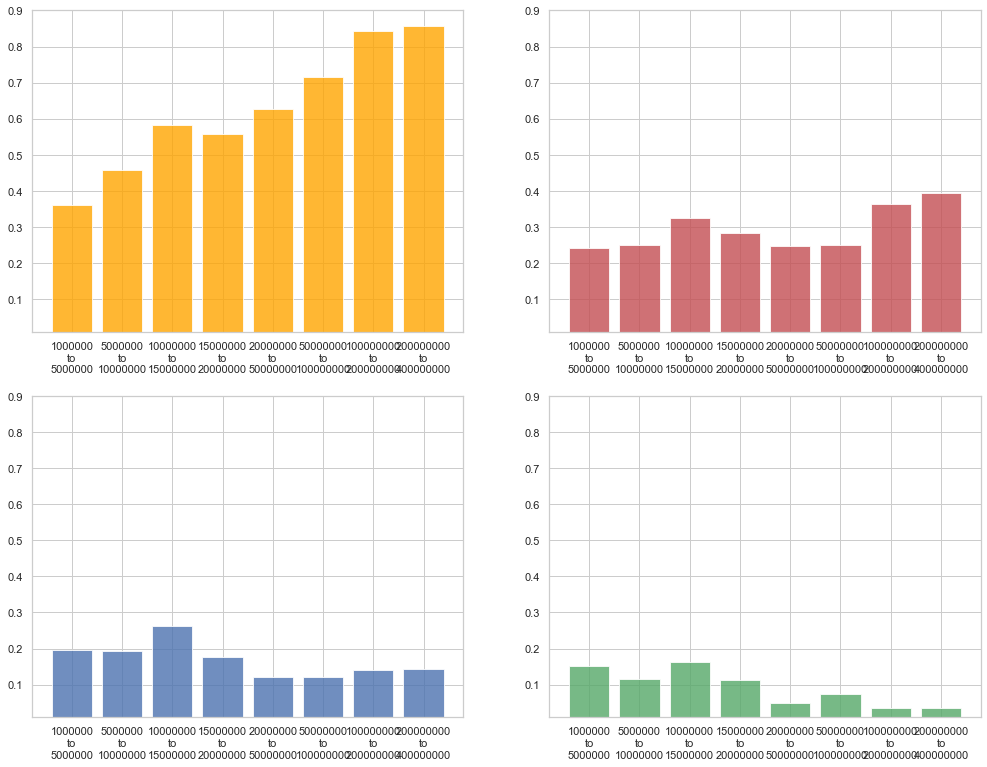

In [749]:
fig, ax = plt.subplots(2, 2, figsize=(17,13))
plt.ylim(.01,.9)
ax[0,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities], probabilities.values(), color='orange', alpha=.8)
ax[0,0].set_ylim(.01,.9)
ax[0,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities5], probabilities5.values(), color='r', alpha=.8)
ax[0,1].set_ylim(.01,.9)
ax[1,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities7], probabilities7.values(), color='b', alpha=.8)
ax[1,0].set_ylim(.01,.9)
ax[1,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities10], probabilities10.values(), color='g', alpha=.8)
ax[1,1].set_ylim(.01,.9)
#ax.set_xlabel('budget in dollars')
#ax.set_ylabel('probability that a film recoups its production and marketing budget')

IGNORE EVERYTHING BELOW THIS 

In [847]:
tn = pd.read_sql('''SELECT *
                 FROM tn_movie_budgets AS tn
                 ''', con)
tn['id_x'] = tn['idx']
tn.drop(tn.columns[0], axis=1, inplace=True)
tn['production_budget'] = tn['production_budget'].str.replace(',', '', regex = True)
tn['production_budget'] = tn['production_budget'].str.replace('$', '', regex = True).astype(int)
tn['domestic_gross'] = tn['domestic_gross'].str.replace(',', '', regex = True)
tn['domestic_gross'] = tn['domestic_gross'].str.replace('$', '', regex = True).astype(int)
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace(',', '', regex = True)
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace('$', '', regex = True).astype(int)
tn.release_date = pd.to_datetime(tn.release_date)
tn['logged_budget'] = np.log(tn['production_budget'])
tn['total_gross'] = tn['worldwide_gross'] + tn['domestic_gross'] 
tn['net_profit'] = tn['total_gross'] - tn['production_budget']
tn['return_on_investment'] = df['total_gross'] / tn['production_budget']
tn = tn[(tn['release_date'] >= '2010-01-01') & (tn['release_date'] <= '2020-01-01')]
month = tn['release_date'].apply(lambda x: x.month)
year = tn['release_date'].apply(lambda x: x.year)
tn['date_month'] = month
tn['date_year'] = year
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,id_x,logged_budget,total_gross,net_profit,return_on_investment,date_month,date_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1,19.833130,1286727750,876127750,3.133774,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2,19.673444,192524700,-157475300,0.550071,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3,19.616420,1862019831,1531419831,5.632244,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4,19.574412,1936903129,1619903129,6.110105,12,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,5,19.539096,2989973445,2683973445,9.771155,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0,5761,9.615805,0,-15000,0.000000,12,2014
5771,72,2015-05-19,Family Motocross,10000,0,0,5771,9.210340,0,-10000,0.000000,5,2015
5772,73,2012-01-13,Newlyweds,9000,4584,4584,5772,9.104980,9168,168,1.018667,1,2012
5777,78,2018-12-31,Red 11,7000,0,0,5777,8.853665,0,-7000,0.000000,12,2018


In [848]:
df.genres

AttributeError: 'DataFrame' object has no attribute 'genres'

In [953]:
imdb = pd.read_sql('''SELECT distinct release_date, movie, production_budget, domestic_gross, worldwide_gross, genres  
                    FROM tn_movie_budgets AS tn
                     JOIN imdb_title_basics AS imdb
                 ON tn.movie = imdb.primary_title
   
                    ;''', con)

# SUBSTRING(release_date, CHARINDEX(release_date) + 8, 12) AS year

            #  AND tn.year = imdb.start_year

In [954]:
imdb_copy = imdb.copy() #shallow copy
imdb_copy.genres = imdb_copy.genres.str.split(',') #this performs the split on the same column of data
imdb_copy = imdb_copy.explode('genres') #this explodes the newly created column and saves it to a new df
imdb_copy.drop_duplicates(subset=['genres', 'movie'], keep='last', inplace = True)
#imdb_copy.head(50)

In [955]:
imdb_copy['production_budget'] = imdb_copy['production_budget'].str.replace(',', '', regex = True)
imdb_copy['production_budget'] = imdb_copy['production_budget'].str.replace('$', '', regex = True).astype(int)
imdb_copy['domestic_gross'] = imdb_copy['domestic_gross'].str.replace(',', '', regex = True)
imdb_copy['domestic_gross'] = imdb_copy['domestic_gross'].str.replace('$', '', regex = True).astype(int)
imdb_copy['worldwide_gross'] = imdb_copy['worldwide_gross'].str.replace(',', '', regex = True)
imdb_copy['worldwide_gross'] = imdb_copy['worldwide_gross'].str.replace('$', '', regex = True).astype(int)
imdb_copy.release_date = pd.to_datetime(imdb_copy.release_date)
imdb_copy['logged_budget'] = np.log(imdb_copy['production_budget'])
imdb_copy['total_gross'] = imdb_copy['worldwide_gross'] + imdb_copy['domestic_gross'] 
imdb_copy['net_profit'] = imdb_copy['total_gross'] - imdb_copy['production_budget']
imdb_copy['return_on_investment'] = imdb_copy['total_gross'] / imdb_copy['production_budget']
imdb_copy = imdb_copy[(imdb_copy['release_date'] >= '2010-01-01') & (imdb_copy['release_date'] <= '2019-01-01')]
imdb_copy = imdb_copy[(imdb_copy['production_budget'] >= 5000000) & (imdb_copy['production_budget'] <= 45000000)]
month = imdb_copy['release_date'].apply(lambda x: x.month)
year = imdb_copy['release_date'].apply(lambda x: x.year)
imdb_copy['date_month'] = month
imdb_copy['date_year'] = year

In [956]:
imdb_copy.genres.value_counts()


Drama          555
Comedy         340
Action         211
Crime          190
Thriller       183
Romance        160
Horror         128
Biography      127
Adventure      103
Mystery         91
Documentary     79
Sci-Fi          55
Family          53
Fantasy         49
Music           45
History         43
Sport           32
Animation       27
War             19
Western          8
Musical          3
News             3
Name: genres, dtype: int64

In [957]:
good_genres = imdb_copy.genres.value_counts().index[:8].tolist()

good_genres

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Romance',
 'Horror',
 'Biography']

In [958]:
dataset = imdb_copy[imdb_copy.genres.isin(good_genres)]
data_wins = dataset[dataset.return_on_investment >= 2]
dataset.genres.value_counts()

Drama        555
Comedy       340
Action       211
Crime        190
Thriller     183
Romance      160
Horror       128
Biography    127
Name: genres, dtype: int64

In [965]:
data_wins.sort_values(by='return_on_investment', ascending=False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,logged_budget,total_gross,net_profit,return_on_investment,date_month,date_year
2551,2017-02-24,Get Out,5000000,176040665,255367951,Thriller,15.424948,431408616,426408616,86.281723,2,2017
2551,2017-02-24,Get Out,5000000,176040665,255367951,Horror,15.424948,431408616,426408616,86.281723,2,2017
2552,2017-01-20,Split,5000000,138141585,278964806,Action,15.424948,417106391,412106391,83.421278,1,2017
2553,2017-01-20,Split,5000000,138141585,278964806,Comedy,15.424948,417106391,412106391,83.421278,1,2017
2553,2017-01-20,Split,5000000,138141585,278964806,Romance,15.424948,417106391,412106391,83.421278,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2013-01-18,The Last Stand,30000000,12050299,48330757,Thriller,17.216708,60381056,30381056,2.012702,1,2013
1218,2013-01-18,The Last Stand,30000000,12050299,48330757,Action,17.216708,60381056,30381056,2.012702,1,2013
2381,2015-06-12,Me and Earl and the Dying Girl,8000000,6758416,9266180,Comedy,15.894952,16024596,8024596,2.003074,6,2015
2381,2015-06-12,Me and Earl and the Dying Girl,8000000,6758416,9266180,Drama,15.894952,16024596,8024596,2.003074,6,2015


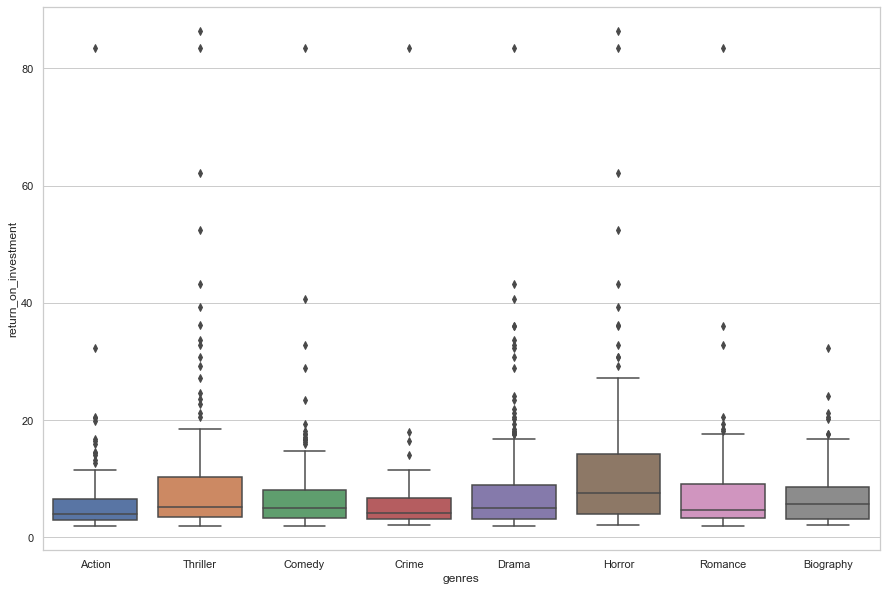

In [960]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set_theme(style="whitegrid")

#dataset = imdb_winners

ax = sns.boxplot(x=data_wins.genres, y="return_on_investment", data=data_wins)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Action     12 non-null     float64
 1   Biography  12 non-null     float64
 2   Comedy     12 non-null     float64
 3   Crime      12 non-null     float64
 4   Drama      12 non-null     float64
 5   Horror     12 non-null     float64
 6   Romance    12 non-null     float64
 7   Thriller   12 non-null     float64
dtypes: float64(8)
memory usage: 864.0 bytes


<AxesSubplot:xlabel='date_month'>

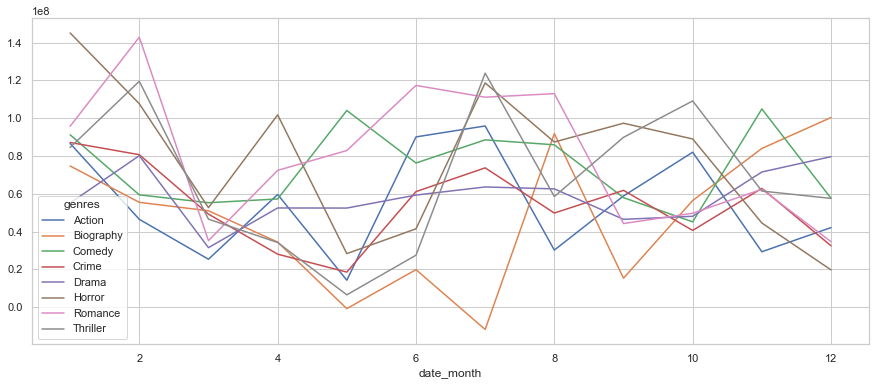

In [966]:
plot_table = dataset.groupby(['genres', 'date_month']).mean().reset_index().pivot(index='date_month', columns='genres', values='net_profit')
plot_table.info()

plot_table.plot(figsize = (15,6))

In [880]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])
df['budget_bins'] = bud_bins
bins = df.budget_bins.unique()[1:]
bins = df.budget_bins.unique()[1:]

In [881]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])
df['budget_bins'] = bud_bins
bins = df.budget_bins.unique()[1:]



probabilitiesj = {}
for bin_ in bins:
    frame = df[(df.budget_bins == bin_) & (df.return_on_investment >= 2)]
    total_in_budget_bin = grouped_bins.loc[bin_]['count']
    number_with_high_ri = frame.shape[0]
    probabilityj = number_with_high_ri/total_in_budget_bin
    probabilitiesj[bin_] = probabilityj
probabilitiesj = dict(sorted(probabilitiesj.items(), key=lambda x: x[0]))

Text(0, 0.5, 'probability that a film recoups its production and marketing budget')

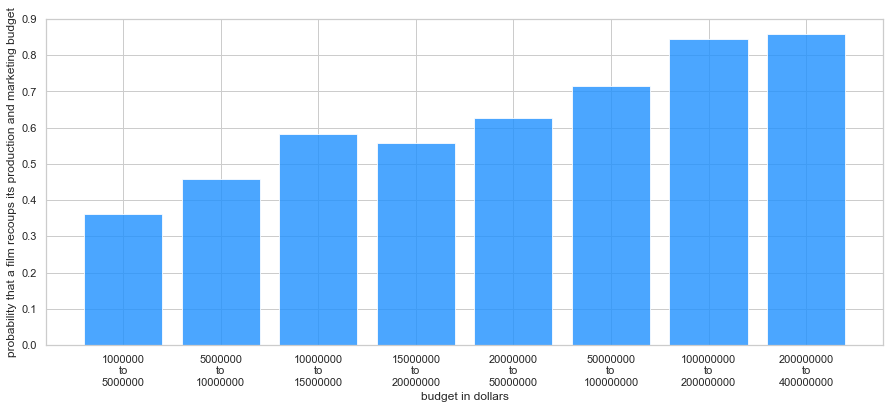

In [882]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar([f'{_.left}\nto\n{_.right}' for _ in probabilitiesj], probabilitiesj.values(), color='dodgerblue', alpha=.8)
ax.set_xlabel('budget in dollars')
ax.set_ylabel('probability that a film recoups its production and marketing budget')

In [883]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])
df['budget_bins'] = bud_bins

In [884]:
def probability(bins, num):
    probabilities = {}
    for bin_ in bins:
        frame = df[(df.budget_bins == bin_) & (df.return_on_investment >= num)]
        total_in_budget_bin = grouped_bins.loc[bin_]['count']
        number_with_high_ri = frame.shape[0]
        probability = number_with_high_ri/total_in_budget_bin
        probabilities[bin_] = probability
    probabilities = dict(sorted(probabilities.items(), key=lambda x: x[0]))
    return probabilities

In [885]:
probabilities = probability(bins, 2)
probabilities5 = probability(bins, 5)
probabilities7 = probability(bins, 7)
probabilities10 = probability(bins, 10)

(0.0, 0.9)

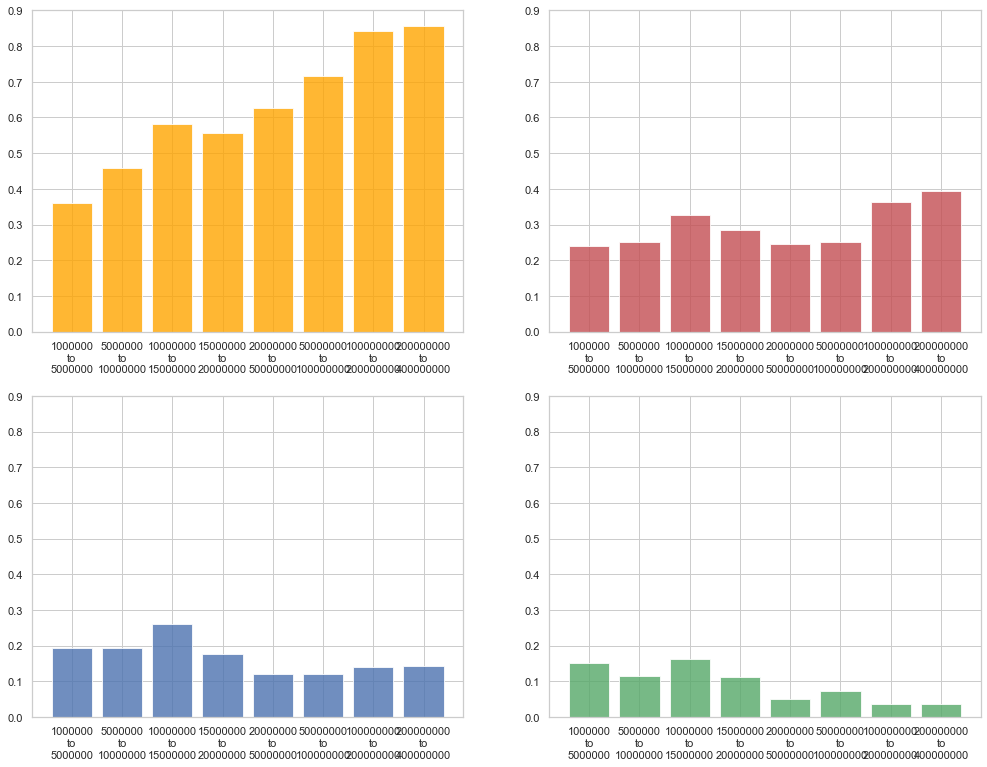

In [899]:
fig, ax = plt.subplots(2, 2, figsize=(17,13))
plt.ylim(.01,.9)
ax[0,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities], probabilities.values(), color='orange', alpha=.8)
ax[0,0].set_ylim(.00,.9)
ax[0,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities5], probabilities5.values(), color='r', alpha=.8)
ax[0,1].set_ylim(.00,.9)
ax[1,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities7], probabilities7.values(), color='b', alpha=.8)
ax[1,0].set_ylim(.00,.9)
ax[1,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities10], probabilities10.values(), color='g', alpha=.8)
ax[1,1].set_ylim(.00,.9)